# Hypothesis Test - Lab

## Introduction

In this lab, you'll have the opportunity to decide to pick the variables that you want to perform one and two sample t-tests.

## Objectives

You will be able to:

* Construct and interpret a confidence interval for a single mean
* Perform a hypothesis test for a single mean
* Construct and interpret a confidence interval for two independent means
* Perform a hypothesis test for two independent means


## The Data: Last Words of Death Row Inmates

On Kaggle there is a famous data set of *[Last Words of Death Row Inmates](https://www.kaggle.com/datasets/mykhe1097/last-words-of-death-row-inmates)*. While this data set is often used for natural language processing, we'll use the non-text data for statistical inference on one and two means using the t-distribution.

### Data Dictionary

The dataset consists of 545 observations with 21 variables. They are:

* `Execution`: The order of execution, numeric.
* `LastName`: Last name of the offender, character.
* `FirstName`: First name of the offender, character.
* `TDCJNumber`: TDCJ Number of the offender, numeric.
* `Age`: Age of the offender, numeric.
* `Race`: Race of the offender, categorical : Black, Hispanic, White, Other.
* `CountyOfConviction`: County of conviction, character.
* `AgeWhenReceived`: Age of offender when received, numeric.
* `EducationLevel`: Education level of offender, numeric.
* `NativeCounty`: Native county of offender, categorical : 0 = Within Texas, 1= Outside Texas.
* `PreviousCrime`: Whether the offender committed any crime before, categorical: 0= No, 1= Yes.
* `Codefendants`: Number of co-defendants, numeric.
* `NumberVictim`: Number of victims, numeric.
* `WhiteVictim`, `HispanicVictim`, `BlackVictim`, `VictimOtherRace` `FemaleVictim`, `MaleVictim`: Number of victims with specified demographic features, numeric.
* `LastStatement`: Last statement of offender, character.

The [data file](https://github.com/learn-co-curriculum/dsc-hypothesis-testing-ent/blob/main/data/texas.csv) that we'll be using has the first 20 variables, i.e. we're excluding the `LastStatement` variable.

*N.B.*: Note this data is from 1982 - 2017 and for that time period the data is exhaustive.

## Preliminary Steps

As usual, begin with importing the Python libraries that you will need. Then bring in the data and explore it.

You'll likely want to use `scipy.stats`. If you want to use `confidence_interval(confidence_level=0.95)` with [`scipy.stats.ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html), then you need to have `scipy` version 1.11.0.

In [2]:

__requires__= 'scipy==11.1.0'

# Bring in germane libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats

scipy.__version__

'1.13.1'

In [3]:
# Read data into dataframe
df = pd.read_csv('data/texas.csv', index_col=0)

Now that you have brought in the data. Consider these or similar commands to get a feel for the data.
* `.info()`
* `.head()`



In [4]:
# Get DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, Cardenas to Brooks, Jr.
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FirstName           383 non-null    object
 1   TDCJNumber          383 non-null    int64 
 2   Age                 383 non-null    int64 
 3   Race                383 non-null    object
 4   CountyOfConviction  383 non-null    object
 5   AgeWhenReceived     383 non-null    int64 
 6   EducationLevel      383 non-null    int64 
 7   NativeCounty        383 non-null    int64 
 8   PreviousCrime       383 non-null    int64 
 9   Codefendants        383 non-null    int64 
 10  NumberVictim        383 non-null    int64 
 11  WhiteVictim         383 non-null    int64 
 12  HispanicVictim      383 non-null    int64 
 13  BlackVictim         383 non-null    int64 
 14  VictimOther.Races   383 non-null    int64 
 15  FemaleVictim        383 non-null    int64 
 16  MaleVictim      

In [5]:
# head
df.head()

,FirstName,TDCJNumber,Age,Race,CountyOfConviction,AgeWhenReceived,EducationLevel,NativeCounty,PreviousCrime,Codefendants,NumberVictim,WhiteVictim,HispanicVictim,BlackVictim,VictimOther.Races,FemaleVictim,MaleVictim
LastName,,,,,,,,,,,,,,,,,
Cardenas,Ruben,999275,47,Hispanic,Hidalgo,28,11,1,0,0,1,0,1,0,0,1,0
Pruett,Robert,999411,38,White,Bee,22,8,0,1,0,1,1,0,0,0,0,1
Preyor,Taichin,999494,46,Black,Bexar,34,10,0,0,0,1,1,0,0,0,0,1
Bigby,James,997,61,White,Tarrant,36,9,0,1,0,1,1,0,0,0,0,1
Ruiz,Rolando,999145,44,Hispanic,Bexar,22,10,0,1,4,1,0,1,0,0,1,0


In [6]:
df.describe()

,TDCJNumber,Age,AgeWhenReceived,EducationLevel,NativeCounty,PreviousCrime,Codefendants,NumberVictim,WhiteVictim,HispanicVictim,BlackVictim,VictimOther.Races,FemaleVictim,MaleVictim
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.00000,383.000000,383.000000,383.000000
mean,579540.853786,39.373368,28.503916,10.182768,0.389034,0.506527,0.814621,1.394256,0.916449,0.248042,0.21671,0.026110,0.689295,0.720627
std,493478.236004,8.653542,8.181793,2.071501,0.562888,0.500611,1.296227,0.761418,0.842780,0.604165,0.65325,0.215492,0.775991,0.721958
min,511.000000,24.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,873.000000,33.000000,22.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,999080.000000,38.000000,26.000000,10.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000
75%,999265.500000,44.000000,33.500000,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000
max,999552.000000,67.000000,57.000000,16.000000,6.000000,1.000000,13.000000,6.000000,5.000000,4.000000,6.00000,3.000000,5.000000,4.000000


### Preprocessing

While there are a number of preprocessing steps you may choose to make, at the very least you should do the following.

Based on the data dictionary and how the data is interpreted by Numpy, convert any non-numeric data into the proper form. Verify that your code worked correctly.

In [7]:
# Use the map function to change the two variables
df["NativeCounty"] = df["NativeCounty"].map({0: "Within Texas", 1: "Outside Texas"})
df["PreviousCrime"] = df["PreviousCrime"].map({0: "No", 1: "Yes"})
df = df.reset_index()

In [8]:
# Verify this was done correctly
# head
df.head()

,LastName,FirstName,TDCJNumber,Age,Race,CountyOfConviction,AgeWhenReceived,EducationLevel,NativeCounty,PreviousCrime,Codefendants,NumberVictim,WhiteVictim,HispanicVictim,BlackVictim,VictimOther.Races,FemaleVictim,MaleVictim
0,Cardenas,Ruben,999275,47,Hispanic,Hidalgo,28,11,Outside Texas,No,0,1,0,1,0,0,1,0
1,Pruett,Robert,999411,38,White,Bee,22,8,Within Texas,Yes,0,1,1,0,0,0,0,1
2,Preyor,Taichin,999494,46,Black,Bexar,34,10,Within Texas,No,0,1,1,0,0,0,0,1
3,Bigby,James,997,61,White,Tarrant,36,9,Within Texas,Yes,0,1,1,0,0,0,0,1
4,Ruiz,Rolando,999145,44,Hispanic,Bexar,22,10,Within Texas,Yes,4,1,0,1,0,0,1,0


In [9]:
# Verify this was done correctly
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   LastName            383 non-null    object
 1   FirstName           383 non-null    object
 2   TDCJNumber          383 non-null    int64 
 3   Age                 383 non-null    int64 
 4   Race                383 non-null    object
 5   CountyOfConviction  383 non-null    object
 6   AgeWhenReceived     383 non-null    int64 
 7   EducationLevel      383 non-null    int64 
 8   NativeCounty        382 non-null    object
 9   PreviousCrime       383 non-null    object
 10  Codefendants        383 non-null    int64 
 11  NumberVictim        383 non-null    int64 
 12  WhiteVictim         383 non-null    int64 
 13  HispanicVictim      383 non-null    int64 
 14  BlackVictim         383 non-null    int64 
 15  VictimOther.Races   383 non-null    int64 
 16  FemaleVictim        383 no

### EDA

Now perform Exploratory Data Analysis of at least three variables of your choosing. You should look at both descriptive statistics and visualizations.

In [10]:
# EDA code sample
# describe
small_df = df[["Age", "EducationLevel", "NumberVictim", "PreviousCrime"]]
small_df.describe()

,Age,EducationLevel,NumberVictim
count,383.000000,383.000000,383.000000
mean,39.373368,10.182768,1.394256
std,8.653542,2.071501,0.761418
min,24.000000,0.000000,0.000000
25%,33.000000,9.000000,1.000000
50%,38.000000,10.000000,1.000000
75%,44.000000,12.000000,2.000000
max,67.000000,16.000000,6.000000


### Age

The age of offenders has an average of 39 years and most of the offender seem to be between 33 and 44 years old.
Youngest offender is 24 years and oldest offender is 67 years old.

This column seems to follow an approximately normal distribution skewed to the right.

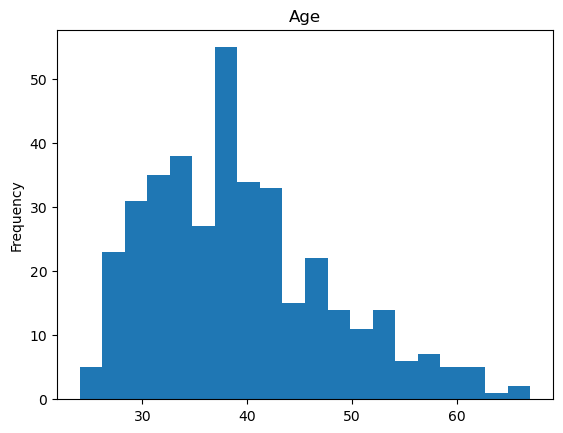

In [11]:
small_df["Age"].plot(kind='hist', bins=20)
plt.title("Age")
plt.show()

### Education Level

We make the assumptions that 12 years mean that the offender completed high school and 16 years mean that the offender completed college. The average offender completed 10 years so, a little bit of high school.

The bulk of the distribution is between 8 and 12 years.

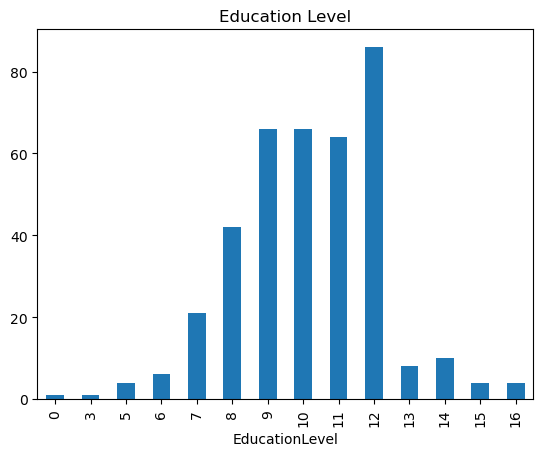

In [12]:
small_df["EducationLevel"].value_counts().sort_index().plot(kind='bar')
plt.title("Education Level")
plt.show()

### Previous Crime

This column is a binary column with 0 meaning no previous crime and 1 meaning that the offender committed a crime before. The number of offenders that previously committed a crime before is 194 compared to 189 that never committed a crime before.

In [13]:
small_df["PreviousCrime"].value_counts()

PreviousCrime
Yes    194
No     189
Name: count, dtype: int64

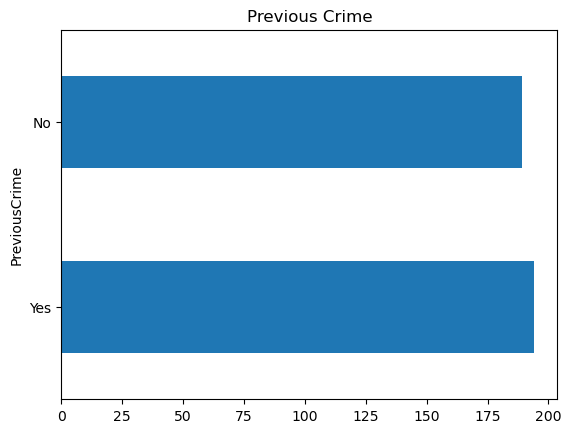

In [14]:
small_df["PreviousCrime"].value_counts().plot(kind='barh')
plt.title("Previous Crime")
plt.show()

### Number of Victims

The average number of victims is 1.4 so an offender is likely to have one victim. Having 3 or more victims is rare.

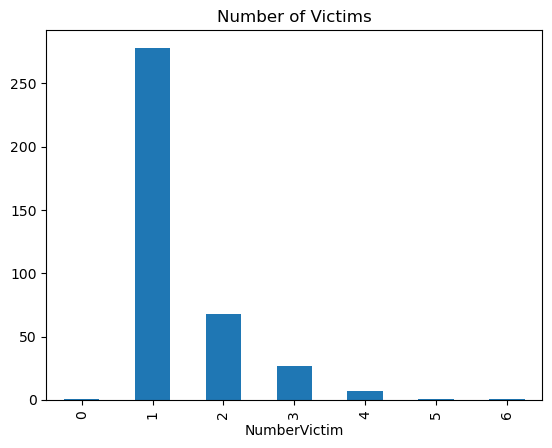

In [15]:
small_df["NumberVictim"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Victims")
plt.show()

## Statistical Inference

### One mean

Now pick a variable that you can perform statistical inference on a single sample mean using the t-distribution.

In the code block below please respond to all of the following (commented out):

*   What is the variable you chose?
*   How do you know it is appropriate for statistical inference on a single mean using the t-distribution?
*   You'll be asked to contruct and interpret a confidence interval. What is the level of confidence that you'll pick?
*   You'll be asked to perform a hypothesis test.
  *   What are the null and alternative hypotheses?
  *   What is the level of significance?



In [16]:
# Responses to questions

# 1. Age column
# 2. The data is approximately normal and has a large enough sample size but, we do not know the population standard deviation. 
# 3. A 95% confidence level
# 4. Null hypothesis: Most offenders are not over 30 years old
#    Alternative: Most offenders are under 30 years old
# 5. 0.05

#### Confidence Interval

Now construct a confidence interval for your chosen variable at the level of confidence you chose above.

In [17]:
df["Age"].size

383

In [18]:
# Construct the confidence interval
stats.t.interval(
    0.95, df["Age"].size, loc=df["Age"].mean(), scale=stats.sem(df["Age"])
)

(38.50397306361337, 40.24276322881482)

Interpret the confidence interval in the code block below (commented out).

In [19]:
# Interpretation
# I am 95% confident that the population mean for Age lies between 38.5 and 40 years old.

#### Hypothesis Test

Now perform a hypothesis test for your chosen variable at the level of significance you chose above.

In [20]:
# Perform the hypothesis test

t_statistic, p_value = stats.ttest_1samp(df["Age"], 30, alternative="less")
t_statistic, p_value

(21.198305605978778, 1.0)

In [21]:
stats.t(df=df["Age"].size).ppf(0.025)

-1.9661771911465

Draw the appropriate conclusion for the hypothesis test and justify your answer in the code block below (commented out).

In [22]:
# Conclusion
# With a p value of 1 we are unable to reject the null hypothesis. We are unable to conclude that offenders are under 30 years old

### Two means

Now pick a variable that you can perform statistical inference on two (independent) sample means using the t-distribution.

In the code block below please respond to all of the following (commented out):

*   What are the variables you chose?
*   How do you know it is appropriate for statistical inference on two (independent)means using the t-distribution?
*   You'll be asked to contruct and interpret a confidence interval. What is the level of confidence that you'll pick?
*   You'll be asked to perform a hypothesis test.
  *   What are the null and alternative hypotheses?
  *   What is the level of significance?

In [23]:

# Responses to questions

# 1. Age & Previous Crime, so group age by previous crime
# 2. The two samples have the same scale and unit of years and they are independent of each other.
# 3. 95% Confidence Interval
# 4. Null: The is no difference in ages between the groups
#    Alternative: There is a difference between ages of people who have committed crimes before and those who haven't
# 5. 0.05

#### Confidence Interval

Now construct a confidence interval for your chosen variables at the level of confidence you chose above.

In [24]:
# Construct the confidence interval
committed_age = df.query("PreviousCrime == 'Yes'")["Age"]
not_committed_age = df.query("PreviousCrime == 'No'")["Age"]


In [25]:
stats.t.interval(
    0.95, loc=not_committed_age.mean(), scale=not_committed_age.std(ddof=1), df=not_committed_age.size
)

(19.7501298349024, 55.784261699489136)

In [26]:
# Perform the hypothesis test
sample1_var = committed_age.var(ddof=1)
sample2_var = not_committed_age.var(ddof=1)
stats.ttest_ind(committed_age, not_committed_age, equal_var=False).confidence_interval(0.95)

ConfidenceInterval(low=1.4557737380591607, high=4.8861233873431225)

Interpret the confidence interval in the code block below (commented out).

In [31]:
# Interpretation
# I am 95% confident that the difference in Age between those who have committed a crime before and those who have not is between 1.5 and 4.8 years.

#### Hypothesis Test

Now perform a hypothesis test for your chosen variable at the level of significance you chose above.

In [28]:
# Perform the hypothesis test
sample1_var = committed_age.var(ddof=1)
sample2_var = not_committed_age.var(ddof=1)
sample1_var, sample2_var

(61.96506596869828, 83.42423730721602)

In [29]:
stats.ttest_ind(committed_age, not_committed_age, equal_var=False)


TtestResult(statistic=3.6354011159056823, pvalue=0.0003168588346324058, df=369.86841615040595)

Draw the appropriate conclusion for the hypothesis test and justify your answer in the code block below (commented out).

In [30]:
# Conclusion
# With a p value of 0.0003 we can conclude that there is a difference in Age between those who have committed a crime before and those who have not.

## Summary

Using a multivariate data set, you were able to pick variables to perform one and two sample t confidence intervals and t-tests.